In [1]:
import pandas as pd
from ast import literal_eval
import random
import numpy as np

# read data from synth
df_orders = pd.read_json('synth_output_data/orders.json')
df_products = pd.read_json('synth_output_data/products.json')
df_partners = pd.read_json('synth_output_data/partners.json')
df_users = pd.read_json('synth_output_data/users.json')
df_support_requests= pd.read_json('synth_output_data/support_requests.json')
df_orders_random = pd.read_json('synth_output_data/orders_random.json')
df_support_requests_random = pd.read_json('synth_output_data/support_requests_random.json')

# merge orders with users
df_orders_users = pd.merge(df_orders, df_users, on="user_id", how="left")

# remove orders created by users before they existed
df_orders_users_cut = df_orders_users.loc[df_orders_users['created_date']<df_orders_users['timestamp']]

# bulk up orders with more random orders to make up for lost orders in previous step
df_orders_random_users = pd.merge(df_orders_random, df_users, on="user_id", how="left")
df_orders_concat = pd.concat([df_orders_users_cut, df_orders_random_users], axis=0)
df_orders_concat = df_orders_concat.drop(['order_id'], axis=1)
df_orders_concat = df_orders_concat.reset_index(drop=True)
df_orders_concat = df_orders_concat.reset_index()
df_orders_concat = df_orders_concat.rename({'index': 'order_id'}, axis=1)
df_orders_concat['order_id'] = df_orders_concat['order_id']+1

# again, remove orders created by users before they existed and also before 2022-06-01
df_orders_concat_cut = df_orders_concat.loc[df_orders_concat['created_date']<df_orders_concat['timestamp']]
df_orders_concat_cut = df_orders_concat_cut.loc[df_orders_concat_cut['timestamp']<'2022-06-01']
df_orders_concat_cut = df_orders_concat_cut.sort_values('timestamp')
df_orders_concat_cut = df_orders_concat_cut.drop('order_id', axis=1)
df_orders_concat_cut = df_orders_concat_cut.reset_index(drop=True)
df_orders_concat_cut = df_orders_concat_cut.reset_index()
df_orders_concat_cut = df_orders_concat_cut.rename({'index': 'order_id'}, axis=1)
df_orders_concat_cut['order_id'] = df_orders_concat_cut['order_id']+1

df_orders = df_orders_concat_cut.copy()

In [2]:
df_orders.sample(5)

,order_id,currency,ordered_product_skus,partner_id,referrer,timestamp,user_id,browser,created_date,email,shipping_address
702,703,USD,[37],6,twitter,2022-05-08 16:26:57,54,chrome,2022-01-09 04:50:25,tobin_numquam@hotmail.com,"{'city': 'Flatley ville', 'country': 'IO', 'st..."
423,424,USD,"[8, 4]",4,direct,2022-05-01 09:51:01,597,chrome,2022-03-30 16:08:24,arvid_voluptatem@gmail.com,"{'city': 'Brekke stad', 'country': 'IQ', 'stre..."
556,557,USD,"[15, 19, 20]",4,ppc,2022-05-04 20:33:03,747,safari,2022-04-21 21:47:59,jordane_perferendis@gmail.com,"{'city': 'Gorczany borough', 'country': 'MT', ..."
540,541,USD,"[23, 40, 36, 11, 35, 9]",2,instagram,2022-05-04 06:55:47,108,edge,2022-01-17 01:48:37,nickolas_quis@gmail.com,"{'city': 'Predovic borough', 'country': 'LV', ..."
645,646,USD,[35],3,instagram,2022-05-07 05:19:05,419,safari,2022-03-06 13:05:34,mable_atque@gmail.com,"{'city': 'Schmeler chester', 'country': 'TC', ..."


<AxesSubplot:>

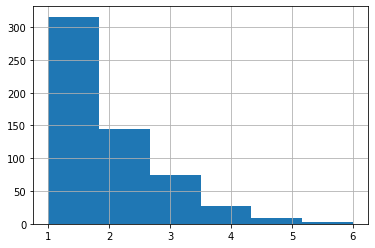

In [3]:
df_orders['user_id'].value_counts().hist(bins=6)

<AxesSubplot:>

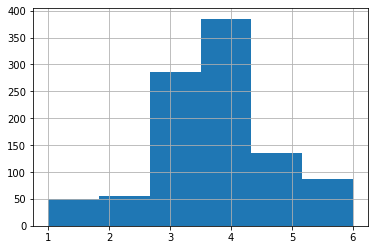

In [4]:
df_orders['partner_id'].hist(bins=6)

In [5]:
df_orders['referrer'].value_counts()

instagram    308
ppc          248
facebook     214
organic      123
direct        76
twitter       31
Name: referrer, dtype: int64

In [6]:
df_orders['ordered_product_skus']

0                      [5, 27]
1                      [31, 9]
2              [28, 32, 7, 40]
3              [33, 15, 37, 3]
4                         [17]
                ...           
995     [39, 25, 3, 33, 5, 20]
996               [27, 20, 19]
997    [30, 1, 14, 20, 24, 26]
998        [2, 11, 40, 33, 17]
999             [3, 13, 6, 26]
Name: ordered_product_skus, Length: 1000, dtype: object

In [7]:
# make some products more popular than others

def product_manipulation(x):
    if i in x:
        if random.randint(0, 10) > 2:
            if len(x) > 1:
                x.remove(i)
    return x

for i in range(1, 43):
    if random.randint(0, 10) > 3:
        print(f'unpopular product: {i}')
        df_orders['ordered_product_skus'] = df_orders['ordered_product_skus'].apply(lambda x: product_manipulation(x))

unpopular product: 1
unpopular product: 2
unpopular product: 4
unpopular product: 5
unpopular product: 8
unpopular product: 10
unpopular product: 13
unpopular product: 14
unpopular product: 16
unpopular product: 17
unpopular product: 18
unpopular product: 19
unpopular product: 20
unpopular product: 21
unpopular product: 22
unpopular product: 24
unpopular product: 27
unpopular product: 29
unpopular product: 30
unpopular product: 32
unpopular product: 36
unpopular product: 38
unpopular product: 39
unpopular product: 40
unpopular product: 41
unpopular product: 42


In [8]:
df_orders

,order_id,currency,ordered_product_skus,partner_id,referrer,timestamp,user_id,browser,created_date,email,shipping_address
0,1,USD,[5],3,ppc,2022-01-03 08:23:34,10,safari,2022-01-02 23:18:24,shannon_consequuntur@yahoo.com,"{'city': 'Klein port', 'country': 'NO', 'stree..."
1,2,USD,"[31, 9]",1,facebook,2022-01-05 08:22:10,13,safari,2022-01-03 08:13:21,casper_corporis@hotmail.com,"{'city': 'Rhea haven', 'country': 'PT', 'stree..."
2,3,USD,"[28, 7]",4,ppc,2022-01-09 22:17:32,24,chrome,2022-01-04 21:10:59,thaddeus_eius@hotmail.com,"{'city': 'Vandervort bury', 'country': 'JO', '..."
3,4,USD,"[33, 15, 37, 3]",3,instagram,2022-01-09 23:32:02,25,edge,2022-01-05 02:27:25,valentina_sit@yahoo.com,"{'city': 'McLaughlin mouth', 'country': 'FM', ..."
4,5,USD,[17],4,ppc,2022-01-10 10:52:09,18,edge,2022-01-03 18:59:06,ed_quas@gmail.com,"{'city': 'Gia land', 'country': 'MR', 'street_..."
...,...,...,...,...,...,...,...,...,...,...,...
995,996,USD,"[39, 25, 3, 33]",6,facebook,2022-05-30 09:52:13,100,edge,2022-01-15 13:28:58,hector_magni@yahoo.com,"{'city': 'Cassin haven', 'country': 'MY', 'str..."
996,997,USD,"[27, 19]",3,instagram,2022-05-30 17:17:13,333,internet_explorer,2022-02-21 14:42:22,deondre_libero@hotmail.com,"{'city': 'Regan chester', 'country': 'MQ', 'st..."
997,998,USD,"[30, 26]",3,facebook,2022-05-31 08:00:34,979,safari,2022-05-27 19:48:10,javon_quia@yahoo.com,"{'city': 'Bayer haven', 'country': 'BI', 'stre..."
998,999,USD,"[11, 33]",4,facebook,2022-05-31 14:30:22,583,netscape,2022-03-29 07:18:34,reagan_corporis@gmail.com,"{'city': 'Bednar mouth', 'country': 'SG', 'str..."


In [9]:
df_orders['ordered_product_skus'].value_counts()

[9]                  17
[6]                  16
[23]                 16
[31]                 15
[17]                 15
                     ..
[34, 12, 25]          1
[11, 15]              1
[15, 35, 3, 9, 9]     1
[10, 10]              1
[3, 13, 6, 26]        1
Name: ordered_product_skus, Length: 610, dtype: int64

In [10]:
# drop unnecesary cols
to_drop = [
    'browser',
    'created_date',
    'email',
    'shipping_address',
]
df_orders.drop(to_drop, inplace=True, axis=1)

# generate basket df by exploding orders on skus
df_baskets = df_orders.explode('ordered_product_skus')[['order_id', 'ordered_product_skus']]
df_baskets.reset_index(inplace=True, drop=True)
df_baskets.reset_index(inplace=True)
df_baskets = df_baskets.rename({'index': 'basket_item_id'}, axis=1)
df_baskets['basket_item_id']+=1

# merge baskets with product data
df_baskets = df_baskets.merge(
    df_products,
    left_on='ordered_product_skus',
    right_on='sku',
    how='left'
)
df_baskets = df_baskets.drop(columns=['price_currency', 'product_name', 'sku'], axis=1)

# calculate basket totals and merge back into baskets
df_baskets_totals = df_baskets.groupby('order_id').sum('price_amount')
df_baskets_totals.reset_index(inplace=True)
df_baskets_totals.drop(columns=['basket_item_id'], axis=1, inplace=True)
df_baskets_totals.rename({'price_amount': 'basket_total'}, inplace=True, axis=1)
df_baskets = df_baskets.merge(df_baskets_totals, on='order_id', how='left')

# create basket totals lookup and drop unncessary cols
df_order_basket_totals = df_baskets.drop_duplicates('order_id', keep='first')
to_drop = [
    'basket_item_id',
    'ordered_product_skus',
    'price_amount',
]
df_order_basket_totals = df_order_basket_totals.drop(columns=to_drop, axis=1)
df_order_basket_totals.reset_index(drop=True, inplace=True)

# merge basket totals back to orders
df_orders = df_orders.merge(df_order_basket_totals, how='left', on='order_id')

In [11]:
df_partners

,partner_commission,partner_id,partner_name
0,0.18,1,Plant Paradise
1,0.14,2,Garden of Sweden
2,0.06,3,"Peat, Fruits and Leaves"
3,0.22,4,Redwood Ranch
4,0.08,5,Trowels R Us
5,0.14,6,Glorious Gardens


In [12]:
df_orders = df_orders.merge(df_partners, on='partner_id', how='left')

In [13]:
df_orders['profit'] = df_orders['basket_total'] * df_orders['partner_commission']

In [14]:
df_orders.drop(columns=['partner_name', 'partner_commission'], axis=1, inplace=True)

In [15]:
df_orders

,order_id,currency,ordered_product_skus,partner_id,referrer,timestamp,user_id,basket_total,profit
0,1,USD,[5],3,ppc,2022-01-03 08:23:34,10,50,3.00
1,2,USD,"[31, 9]",1,facebook,2022-01-05 08:22:10,13,85,15.30
2,3,USD,"[28, 7]",4,ppc,2022-01-09 22:17:32,24,170,37.40
3,4,USD,"[33, 15, 37, 3]",3,instagram,2022-01-09 23:32:02,25,260,15.60
4,5,USD,[17],4,ppc,2022-01-10 10:52:09,18,3,0.66
...,...,...,...,...,...,...,...,...,...
995,996,USD,"[39, 25, 3, 33]",6,facebook,2022-05-30 09:52:13,100,244,34.16
996,997,USD,"[27, 19]",3,instagram,2022-05-30 17:17:13,333,68,4.08
997,998,USD,"[30, 26]",3,facebook,2022-05-31 08:00:34,979,156,9.36
998,999,USD,"[11, 33]",4,facebook,2022-05-31 14:30:22,583,90,19.80


In [16]:
df_orders.to_csv('transformed_data/orders.csv', index=False)

In [17]:
df_baskets

,basket_item_id,order_id,ordered_product_skus,price_amount,basket_total
0,1,1,5,50,50
1,2,2,31,25,85
2,3,2,9,60,85
3,4,3,28,75,170
4,5,3,7,95,170
...,...,...,...,...,...
2162,2163,999,33,20,90
2163,2164,1000,3,130,289
2164,2165,1000,13,4,289
2165,2166,1000,6,5,289


In [18]:
df_baskets.to_csv('transformed_data/baskets.csv', index=False)

<AxesSubplot:>

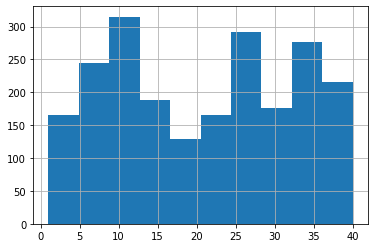

In [19]:
df_baskets['ordered_product_skus'].hist()

In [20]:
df_baskets

,basket_item_id,order_id,ordered_product_skus,price_amount,basket_total
0,1,1,5,50,50
1,2,2,31,25,85
2,3,2,9,60,85
3,4,3,28,75,170
4,5,3,7,95,170
...,...,...,...,...,...
2162,2163,999,33,20,90
2163,2164,1000,3,130,289
2164,2165,1000,13,4,289
2165,2166,1000,6,5,289


In [21]:
df_baskets[['order_id', 'ordered_product_skus']].groupby('order_id').agg('count')

,ordered_product_skus
order_id,
1,1
2,2
3,2
4,4
5,1
...,...
996,4
997,2
998,2


In [22]:
df_products.sample(10)

,price_amount,price_currency,product_name,sku
9,40,USD,Pink heritage pot medium,10
34,20,USD,Gerbera,35
37,25,USD,Money plant,38
23,99,USD,Magnolia,24
25,150,USD,Mixed Rhododendron,26
16,3,USD,Basil seeds,17
1,250,USD,Wood-fired pizza oven,2
33,20,USD,Peony,34
35,30,USD,Peace lily,36
39,24,USD,Aloe vera,40


In [23]:
df_products.to_csv('transformed_data/products.csv', index=False)

In [24]:
df_partners

,partner_commission,partner_id,partner_name
0,0.18,1,Plant Paradise
1,0.14,2,Garden of Sweden
2,0.06,3,"Peat, Fruits and Leaves"
3,0.22,4,Redwood Ranch
4,0.08,5,Trowels R Us
5,0.14,6,Glorious Gardens


In [25]:
df_partners.to_csv('transformed_data/partners.csv', index=False)

In [26]:
df_users.sample(10)

,browser,created_date,email,shipping_address,user_id
421,safari,2022-03-07 05:38:10,rex_dolorum@gmail.com,"{'city': 'North Laron McGlynn ton', 'country':...",422
728,edge,2022-04-19 02:55:19,cecile_optio@yahoo.com,"{'city': 'Marcella chester', 'country': 'MC', ...",729
386,chrome,2022-02-28 10:13:14,parker_asperiores@hotmail.com,"{'city': 'South Kristian Tromp view', 'country...",387
630,safari,2022-04-05 02:21:59,bobby_magnam@gmail.com,"{'city': 'Schowalter land', 'country': 'LV', '...",631
959,chrome,2022-05-25 06:32:45,kim_est@yahoo.com,"{'city': 'Heidenreich ton', 'country': 'ML', '...",960
111,chrome,2022-01-17 16:14:59,nikita_unde@hotmail.com,"{'city': 'East Mia Herman fort', 'country': 'C...",112
171,chrome,2022-01-27 17:20:21,alexane_magnam@yahoo.com,"{'city': 'Nitzsche town', 'country': 'GN', 'st...",172
116,chrome,2022-01-18 14:16:15,treva_consequuntur@yahoo.com,"{'city': 'Keebler mouth', 'country': 'HK', 'st...",117
204,netscape,2022-02-02 19:51:27,syble_voluptate@gmail.com,"{'city': 'Alec ton', 'country': 'PW', 'street_...",205
744,safari,2022-04-21 11:59:59,davion_consectetur@yahoo.com,"{'city': 'Marcelle fort', 'country': 'VN', 'st...",745


In [27]:
df_users['browser'].value_counts()

chrome               501
safari               243
edge                 179
firefox               41
internet_explorer     20
netscape              14
lynx                   2
Name: browser, dtype: int64

In [28]:
df_users.to_csv('transformed_data/users.csv', index=False)

In [29]:
df_orders_support_requests = pd.merge(df_support_requests, df_orders_concat_cut, how='left', on='order_id')
df_orders_support_requests = df_orders_support_requests.loc[df_orders_support_requests['timestamp_x']>df_orders_support_requests['timestamp_y']]
df_orders_support_requests.rename({'timestamp_x': 'timestamp'}, axis=1, inplace=True)

to_drop = [
    'currency',
    'ordered_product_skus',
    'partner_id',
    'referrer',
    'timestamp_y',
    'user_id'
]

df_orders_support_requests.drop(to_drop, inplace=True, axis=1)
df_orders_support_requests_concat = pd.concat([df_orders_support_requests, df_support_requests_random])

df_orders_support_requests_concat_merge = pd.merge(df_orders_support_requests_concat, df_orders_concat_cut, how='left', on='order_id')
df_orders_support_requests_concat_merge_cut = df_orders_support_requests_concat_merge.loc[df_orders_support_requests_concat_merge['timestamp_x']>df_orders_support_requests_concat_merge['timestamp_y']]
df_orders_support_requests_concat_merge_cut = df_orders_support_requests_concat_merge_cut.rename({'timestamp_x': 'timestamp'}, axis=1)

to_drop = [
    'currency',
    'ordered_product_skus',
    'partner_id',
    'referrer',
    'timestamp_y',
    'user_id'
]

df_orders_support_requests_concat_merge_cut.drop(to_drop, inplace=True, axis=1)

<AxesSubplot:>

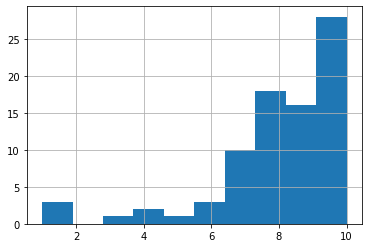

In [30]:
df_orders_support_requests_concat_merge_cut['feedback_rating'].hist()

In [31]:
df_orders_support_requests_concat_merge_cut['reason'].value_counts()

Delivery issue           37
Product related query    25
Wrong item received      11
Payment issue             9
Name: reason, dtype: int64

In [32]:
df_orders_support_requests_concat_merge_cut['order_id'].value_counts()

31     2
7      2
95     2
79     2
50     1
      ..
702    1
552    1
110    1
342    1
178    1
Name: order_id, Length: 78, dtype: int64

In [33]:
df_orders_support_requests_concat_merge_cut.to_csv('transformed_data/support_requests.csv', index=False)